In [528]:
import numpy as np
import matplotlib.pyplot as plt

from preprocessing.load import load_dataset
from preprocessing.missing_data import drop_columns, fill_nan_with_value
from preprocessing.transform import transform_categorical_column

In [529]:
train_dataset_path = 'data/train.csv'
train_dataset = load_dataset(train_dataset_path)

In [530]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [531]:
train_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [532]:
na_columns = train_dataset.columns[train_dataset.isna().sum() > 0]
train_dataset[na_columns].isna().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

We can see that some features are missing on most of our dataset, such as the features of PoolQC and Alley. Let's see if that happens on our test data as well

In [533]:
test_dataset_path = 'data/test.csv'
test_dataset = load_dataset(test_dataset_path)

In [534]:
test_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [535]:
test_na_columns = test_dataset.columns[test_dataset.isna().sum() > 0]
test_dataset[test_na_columns].isna().sum().sort_values(ascending=False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

We can see that the test dataset has even more columns with missing data. However, some variables are vastly missing from both datasets. They are:

PoolQC, MiscFeature, Alley, Fence, FireplaceQu, LotFrontage

I believe we can safely remove both PollQC, MiscFeatures and Alley variables from our analysis, since they are missing in most of our examples.

In [536]:
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley']

train_dataset = drop_columns(train_dataset, columns_to_drop)
test_dataset = drop_columns(test_dataset, columns_to_drop)

In [537]:
len(train_dataset.columns)

78

Now, let's take a look at the most correlated variables with "SalePrice":

In [538]:
train_dataset.corr().loc[:, 'SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

We can see that some variables have less correlation with "SalePrice" than the "Id" variable. However, we must further investigate into this issue, since some of these variables may be categorical ones, not allowing for a proper correlation measurement.

Let's list all of our categorical variables:

* MSSubClass
* MSZoning
* Street
* Alley
* LotShape
* LandContour
* Utilities
* LotConfig
* LandSlope
* Neighborhood
* Condition1
* Condition2
* BldgType
* HouseStyle
* OverallQual
* OverallCond
* RoofStyle
* RoofMatl
* Exterior1st
* Exterior2nd
* ExterQual
* ExterCond
* MasVnrType
* Foundation
* BsmtQual
* BsmtCond
* BsmtExposure
* BsmtFinType1
* BsmtFinType2
* Heating
* HeatingQC
* CentralAir
* Electrical
* KitchenQual
* Functional
* FireplaceQu
* GarageType
* GarageFinish
* GarageQual
* GarageCond
* PavedDrive
* PoolQC
* Fence
* MiscFeature
* MoSold
* YrSold
* SaleType
* SaleCondition

We can see we have a lot of categorical variables in our hand. First, some of these variable are not present our DataFrame anylonger, such as PoolQC, MiscFeature and Alley. Second, let's identify which of these variables are numerical and which ones are not:

In [539]:
categorical_columns = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
                       'ExterCond', 'MasVnrType', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
                       'FireplaceQu',  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
                       'Fence', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

train_dataset[categorical_columns].select_dtypes(include=np.int)

,MSSubClass,OverallQual,OverallCond,MoSold,YrSold
0,60,7,5,2,2008
1,20,6,8,5,2007
2,60,7,5,9,2008
3,70,7,5,2,2006
4,60,8,5,12,2008
5,50,5,5,10,2009
6,20,8,5,8,2007
7,60,7,6,11,2009
8,50,7,5,4,2008
9,190,5,6,1,2008


We can see that only five variables are numeric. Also, only two of these variables are **Ordinal**: OverallQual and OverallCond. Let's verify if there is no missing values for these variables in both our train and test dataset:

In [540]:
train_dataset[['OverallQual', 'OverallCond']].isna().sum()

OverallQual    0
OverallCond    0
dtype: int64

In [541]:
test_dataset[['OverallQual', 'OverallCond']].isna().sum()

OverallQual    0
OverallCond    0
dtype: int64

Great, these variables are not missing in any of our datasets. However, let's see if these variables are correlated or not:

In [542]:
train_dataset['OverallQual'].corr(train_dataset['OverallCond'])

-0.0919323426390718

They are surprinsingly much correlated. Let's look at the scatter plot of these variables and see better their behavior:

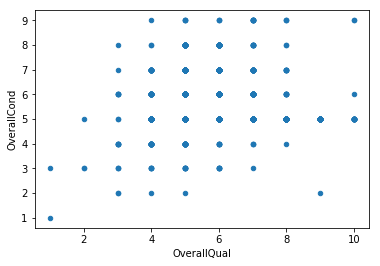

In [543]:
train_dataset.plot.scatter(x='OverallQual',
                           y='OverallCond')

Let's also take a look at a sample of the train_dataset and see if that pattern also happens:

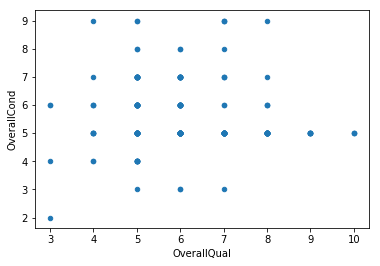

In [544]:
train_dataset.sample(200).plot.scatter(x='OverallQual',
                                       y='OverallCond')

It seems these variables are indeed not much correlated at all. Since these are ordinal variables as well, we can keep both variables and exclude them from our categorical analysis.

In [545]:
categorical_columns.remove('OverallQual')
categorical_columns.remove('OverallCond')

print(categorical_columns)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'MasVnrType', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


However, shouldn't all "Qual" and "Cond" variable follow the same trend ? They should, but it almost certain that the other variables have missing values. Let's verify that:

In [546]:
qual_and_cond = ['HeatingQC', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'KitchenQual','FireplaceQu', 'GarageQual', 'GarageCond']

train_dataset[qual_and_cond].isna().sum()

HeatingQC        0
ExterQual        0
ExterCond        0
BsmtQual        37
BsmtCond        37
KitchenQual      0
FireplaceQu    690
GarageQual      81
GarageCond      81
dtype: int64

In [547]:
train_dataset[qual_and_cond].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
HeatingQC      1460 non-null object
ExterQual      1460 non-null object
ExterCond      1460 non-null object
BsmtQual       1423 non-null object
BsmtCond       1423 non-null object
KitchenQual    1460 non-null object
FireplaceQu    770 non-null object
GarageQual     1379 non-null object
GarageCond     1379 non-null object
dtypes: object(9)
memory usage: 102.7+ KB


Some of these variables are not missing at all, them why are they not numeric ? Some of them are encoded with labels instead of numbers, but they are still **Ordinal** variables. These happens for ExterQual, ExterCond, KitchenQual. Let's translate these variables into number them. But before that, let's see if these variables are not missing from our test set as well:

In [548]:
test_dataset[qual_and_cond].isna().sum()

HeatingQC        0
ExterQual        0
ExterCond        0
BsmtQual        44
BsmtCond        45
KitchenQual      1
FireplaceQu    730
GarageQual      78
GarageCond      78
dtype: int64

We have one missing KitchenQual variable in our test set, but both ExterQual and ExterCond are okay. Let's first transform these variables and then deal with the missing one on our test set.

In [549]:
dict_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

transform_categorical_column(train_dataset, 'ExterQual', dict_map)
transform_categorical_column(train_dataset, 'ExterCond', dict_map)
transform_categorical_column(train_dataset, 'HeatingQC', dict_map)
transform_categorical_column(train_dataset, 'KitchenQual', dict_map)

print(train_dataset[qual_and_cond].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
HeatingQC      1460 non-null int64
ExterQual      1460 non-null int64
ExterCond      1460 non-null int64
BsmtQual       1423 non-null object
BsmtCond       1423 non-null object
KitchenQual    1460 non-null int64
FireplaceQu    770 non-null object
GarageQual     1379 non-null object
GarageCond     1379 non-null object
dtypes: int64(4), object(5)
memory usage: 102.7+ KB
None


Let's take a look now at the test set and see the row containing the missing KitchenQual variable:

In [550]:
test_dataset[test_dataset['KitchenQual'].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
95,1556,50,RL,72.0,10632,Pave,IR1,Lvl,AllPub,Inside,...,248,0,0,0,NaN,0,1,2010,COD,Normal


In [551]:
test_dataset[(test_dataset['MSSubClass'] == 50) &
             (test_dataset['MSZoning'] == 'RL') &
             (test_dataset['OverallQual'] == 5) &
             (test_dataset['OverallCond'] == 3)]['KitchenQual']

95     NaN
381     TA
Name: KitchenQual, dtype: object

In [552]:
test_dataset.loc[test_dataset['KitchenQual'].isna(), 'KitchenQual'] = 'TA'

In [553]:
test_dataset[qual_and_cond].isna().sum()

HeatingQC        0
ExterQual        0
ExterCond        0
BsmtQual        44
BsmtCond        45
KitchenQual      0
FireplaceQu    730
GarageQual      78
GarageCond      78
dtype: int64

Here, we have tried to find similar houses in our test set than the one with the missing variable and use the label os this house as the label for our missing row.

In [554]:
transform_categorical_column(test_dataset, 'ExterQual', dict_map)
transform_categorical_column(test_dataset, 'ExterCond', dict_map)
transform_categorical_column(test_dataset, 'HeatingQC', dict_map)
transform_categorical_column(test_dataset, 'KitchenQual', dict_map)

print(test_dataset[qual_and_cond].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 9 columns):
HeatingQC      1459 non-null int64
ExterQual      1459 non-null int64
ExterCond      1459 non-null int64
BsmtQual       1415 non-null object
BsmtCond       1414 non-null object
KitchenQual    1459 non-null int64
FireplaceQu    729 non-null object
GarageQual     1381 non-null object
GarageCond     1381 non-null object
dtypes: int64(4), object(5)
memory usage: 102.7+ KB
None


Now, let's take a look at our other variables:

* BsmtQual, BsmtCond, FireplaceQu, GarageQual, GarageCond

These variable are harder to read and interpret, since two distinct situations may be happening:

* The NaN are corresponding to NA entries (Not Applicable)
* These variables are actually NaN

We will proceed with the following approach, if the variable has the NA possibility, we will replace the NaN with 0.

Since all of the list variables have this allowed label, we will replace all NaN for the NP label.

In [555]:
fill_nan_columns = ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond']
fill_nan_with_value(train_dataset, fill_nan_columns, 'NP')
fill_nan_with_value(test_dataset, fill_nan_columns, 'NP')

In [556]:
dict_map['NP'] = 0

for column in fill_nan_columns:
    transform_categorical_column(train_dataset, column, dict_map)
    transform_categorical_column(test_dataset, column, dict_map)


In [557]:
train_dataset[fill_nan_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
BsmtQual       1460 non-null int64
BsmtCond       1460 non-null int64
FireplaceQu    1460 non-null int64
GarageQual     1460 non-null int64
GarageCond     1460 non-null int64
dtypes: int64(5)
memory usage: 57.1 KB


In [558]:
test_dataset[fill_nan_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 5 columns):
BsmtQual       1459 non-null int64
BsmtCond       1459 non-null int64
FireplaceQu    1459 non-null int64
GarageQual     1459 non-null int64
GarageCond     1459 non-null int64
dtypes: int64(5)
memory usage: 57.1 KB


Great, now let's remove these variables from our categorical ones:

In [559]:
for column in fill_nan_columns:
    categorical_columns.remove(column)

In [560]:
categorical_columns.remove('KitchenQual')
categorical_columns.remove('ExterQual')
categorical_columns.remove('ExterCond')
categorical_columns.remove('HeatingQC')

In [561]:
print(categorical_columns)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


Now, there are still other **Ordinal** variable we can find, they are:

* BsmtFinType1, BsmtFinType2, BsmtExposure, Utilities, Fence

Let's transform these variables as well.

In [562]:
bsmt_columns = ['BsmtFinType1', 'BsmtFinType2']
fill_nan_with_value(train_dataset, bsmt_columns, 'NP')
fill_nan_with_value(test_dataset, bsmt_columns, 'NP')

dict_map = {'NP': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

for column in bsmt_columns:
    transform_categorical_column(train_dataset, column, dict_map)
    transform_categorical_column(test_dataset, column, dict_map)
    categorical_columns.remove(column)

For the "Utilities" variable, all the houses have almost always the same value:

In [563]:
train_dataset['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [564]:
test_dataset['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

Let's remove it from our datasets them:

In [565]:
train_dataset = drop_columns(train_dataset, ['Utilities'])
test_dataset = drop_columns(test_dataset, ['Utilities'])

categorical_columns.remove('Utilities')

In [566]:
exposure_column = ['BsmtExposure']
fill_nan_with_value(train_dataset, exposure_column, 'NP')
fill_nan_with_value(test_dataset, exposure_column, 'NP')
dict_map = {'NP': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

for column in exposure_column:
    transform_categorical_column(train_dataset, column, dict_map)
    transform_categorical_column(test_dataset, column, dict_map)
    categorical_columns.remove(column)

In [567]:
fence_column = ['Fence']
fill_nan_with_value(train_dataset, fence_column, 'NP')
fill_nan_with_value(test_dataset, fence_column, 'NP')

dict_map = {'NP': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

for column in fence_column:
    transform_categorical_column(train_dataset, column, dict_map)
    transform_categorical_column(test_dataset, column, dict_map)
    categorical_columns.remove(column)

Let's now remove the NaN from the other garage variables as well:

In [568]:
garage_columns = ['GarageFinish', 'GarageType', 'GarageYrBlt']
fill_nan_with_value(train_dataset, garage_columns, 'NP')
fill_nan_with_value(test_dataset, garage_columns, 'NP')

Now, let's fill the missing Electrical value in our training set:

In [569]:
train_dataset.loc[train_dataset['Electrical'].isna(), ['OverallQual','OverallCond', 'LotShape']]

,OverallQual,OverallCond,LotShape
1379,5,5,Reg


In [570]:
train_dataset.loc[((train_dataset['MSSubClass'] == 80) &
                  (train_dataset['MSZoning'] == 'RL') &
                  (train_dataset['OverallQual'] == 5) &
                  (train_dataset['OverallCond'] == 5) &
                  (train_dataset['LotShape'] == 'Reg')), 'Electrical']

54      SBrkr
806     SBrkr
808     SBrkr
1229    SBrkr
1379      NaN
Name: Electrical, dtype: object

In [571]:
train_dataset.loc[train_dataset['Electrical'].isna(), 'Electrical'] = 'SBrkr'

For both **MasVnrType** and **MasVnrArea** that are missing, we going to fill these variable with 0 or an appropriate label:

In [572]:
fill_nan_with_value(train_dataset, ['MasVnrType'], 'NP')
fill_nan_with_value(test_dataset, ['MasVnrType'], 'NP')

fill_nan_with_value(train_dataset, ['MasVnrArea'], 0)
fill_nan_with_value(test_dataset, ['MasVnrArea'], 0)

Initially, we will use the mean value to fill our **LotFrontage** variable for both train and test datasets.
However, we can take a better care for this later, since this can be a poor approach:

In [573]:
lot_frontage_mean = train_dataset['LotFrontage'].mean()
train_dataset.loc[train_dataset['LotFrontage'].isna(), 'LotFrontage'] = lot_frontage_mean

Let's now deal with the rest of the missing data on our test dataset:

In [574]:
lot_frontage_mean = test_dataset['LotFrontage'].mean()
test_dataset.loc[test_dataset['LotFrontage'].isna(), 'LotFrontage'] = lot_frontage_mean

In [575]:
test_dataset.loc[:, test_dataset.isna().any().tolist()].isna().sum()

MSZoning        4
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [576]:
test_dataset.loc[test_dataset['Exterior1st'].isna(), ['MSSubClass', 'LotArea', 'MSZoning', 'LotShape', 'OverallQual', 'OverallCond']]

,MSSubClass,LotArea,MSZoning,LotShape,OverallQual,OverallCond
691,30,19550,RL,Reg,5,7


In [577]:
test_dataset.loc[((test_dataset['MSSubClass'] == 30) &
                  (test_dataset['MSZoning'] == 'RL') &
                  (test_dataset['OverallQual'] == 5) &
                  (test_dataset['LotShape'] == 'Reg') &
                  (test_dataset['OverallCond'] == 7)), ['Exterior1st', 'Neighborhood']]

,Exterior1st,Neighborhood
324,MetalSd,OldTown
328,Wd Sdng,OldTown
691,NaN,Edwards
1344,Wd Sdng,Edwards


In [578]:
test_dataset.loc[test_dataset['Exterior1st'].isna(), 'Exterior1st'] = 'Wd Sdng'

In [579]:
test_dataset.loc[test_dataset['Exterior2nd'].isna(), ['MSSubClass', 'LotArea', 'MSZoning', 'LotShape', 'OverallQual', 'OverallCond']]

,MSSubClass,LotArea,MSZoning,LotShape,OverallQual,OverallCond
691,30,19550,RL,Reg,5,7


In [580]:
test_dataset.loc[((test_dataset['MSSubClass'] == 30) &
                  (test_dataset['MSZoning'] == 'RL') &
                  (test_dataset['OverallQual'] == 5) &
                  (test_dataset['LotShape'] == 'Reg') &
                  (test_dataset['OverallCond'] == 7)), ['Exterior2nd', 'Neighborhood']]

,Exterior2nd,Neighborhood
324,MetalSd,OldTown
328,Wd Sdng,OldTown
691,NaN,Edwards
1344,Wd Sdng,Edwards


In [581]:
test_dataset.loc[test_dataset['Exterior2nd'].isna(), 'Exterior2nd'] = 'Wd Sdng'

In [585]:
fill_nan_with_value(
    test_dataset, 
    ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
     'GarageCars', 'GarageArea', 'BsmtFullBath', 'BsmtHalfBath'],
    0)

In [586]:
fill_nan_with_value(test_dataset, ['MSZoning'], 'RL') # Completing variable with mode

In [588]:
fill_nan_with_value(test_dataset, ['Functional'],'Typ')

In [601]:
fill_nan_with_value(test_dataset, ['SaleType'], 'WD')

In [602]:
test_dataset.loc[:, test_dataset.isna().any().tolist()].isna().sum()

Series([], dtype: float64)

Okay, we have cleaned our dataset and transformed some ordinal categorical variables into numeric types. Next, we will look back at correlation, considering both numeric and categorical variables we now have.